In [95]:
#Import modules 
import pandas as pd
from datetime import datetime as dt
import numpy as np

In [2]:
#Path to CSV files
zillow_path = "data/original/zillow_data.csv"
unem_path = "data/original/state_unem_rate.csv"

#Read the CSV files to create df
zillow_data = pd.read_csv(zillow_path)
unem_data = pd.read_csv(unem_path)

In [3]:
#Drop columns that we dont need in our database (or that can mess up an axis summation)
d_zillow = zillow_data.drop(columns = ["RegionType","RegionID"])

#Create a list of all columns with housing prices
dates = ['1/31/2017','2/28/2017','3/31/2017','4/30/2017','5/31/2017','6/30/2017','7/31/2017',
         '8/31/2017','9/30/2017','10/31/2017','11/30/2017','12/31/2017','1/31/2018','2/28/2018',
         '3/31/2018','4/30/2018','5/31/2018','6/30/2018','7/31/2018','8/31/2018','9/30/2018',
         '10/31/2018','11/30/2018','12/31/2018','1/31/2019','2/28/2019','3/31/2019','4/30/2019',
         '5/31/2019','6/30/2019','7/31/2019','8/31/2019','9/30/2019','10/31/2019','11/30/2019',
         '12/31/2019','1/31/2020','2/29/2020','3/31/2020','4/30/2020','5/31/2020','6/30/2020',
         '7/31/2020','8/31/2020','9/30/2020','10/31/2020','11/30/2020','12/31/2020','1/31/2021',
         '2/28/2021','3/31/2021','4/30/2021','5/31/2021','6/30/2021','7/31/2021','8/31/2021',
         '9/30/2021','10/31/2021','11/30/2021','12/31/2021'
]

#Create a new column titled 'total' to house the newly added totals and sum the values across using 'axis=1'
d_zillow["Totals"] = d_zillow[dates].sum(axis=1)

#Reset index to create similar column for merge
id_zillow = d_zillow.reset_index()

To make sure we have the correct averages we will be dynamically averaging every column based on how many values were present in the row

In [4]:
#Divide the totals by the amount of rows that contain a value
avg_sum = d_zillow["Totals"].divide((d_zillow.count(axis=1)-4))

#Create a new df for the above values
df = pd.DataFrame(avg_sum, columns = ['Average'])

#Reset index to create similar column for merge
idf = df.reset_index()

#Merge the new dataframe back into our original dataframe
combo_df = pd.merge(id_zillow, idf)
combo_df

,index,SizeRank,RegionName,StateName,1/31/2017,2/28/2017,3/31/2017,4/30/2017,5/31/2017,6/30/2017,...,5/31/2021,6/30/2021,7/31/2021,8/31/2021,9/30/2021,10/31/2021,11/30/2021,12/31/2021,Totals,Average
0,0,0,United States,ALL,212615.0,213735.0,214896.0,216137.0,217323.0,218461.0,...,286948.0,292471,298349.0,303739.0,308359.0,312452.0,316333,320662.0,14970538.0,249508.966667
1,1,1,"New York, NY",NY,430417.0,432050.0,434134.0,435828.0,438404.0,440627.0,...,534026.0,541165,549066.0,556634.0,562515.0,567048.0,570588,573813.0,29021798.0,483696.633333
2,2,2,"Los Angeles-Long Beach-Anaheim, CA",CA,599538.0,602599.0,605959.0,607529.0,610712.0,614483.0,...,783767.0,803587,824502.0,837956.0,847074.0,851836.0,859045,868350.0,41403420.0,690057.000000
3,3,3,"Chicago, IL",IL,219234.0,220916.0,222697.0,223977.0,224934.0,225078.0,...,266508.0,270301,274437.0,278525.0,281576.0,284217.0,286894,289595.0,14599266.0,243321.100000
4,4,4,"Dallas-Fort Worth, TX",TX,216427.0,218313.0,219762.0,221407.0,222894.0,224475.0,...,297205.0,304541,312359.0,320271.0,327472.0,333559.0,339033,344919.0,15567695.0,259461.583333
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
903,903,929,"Lamesa, TX",TX,61977.0,62657.0,63197.0,63626.0,64004.0,64376.0,...,83934.0,84374,85338.0,86452.0,87499.0,88422.0,88981,90535.0,4412230.0,73537.166667
904,904,930,"Craig, CO",CO,208201.0,209612.0,210569.0,210815.0,210653.0,210110.0,...,226808.0,230257,233337.0,237027.0,240324.0,243306.0,244921,248330.0,12434908.0,210761.152542
905,905,931,"Pecos, TX",TX,NaN,NaN,NaN,NaN,NaN,NaN,...,147919.0,149956,152410.0,157488.0,162244.0,166957.0,167995,170763.0,3571269.0,142850.760000
906,906,932,"Vernon, TX",TX,64299.0,64748.0,65064.0,65444.0,65751.0,66073.0,...,74175.0,74851,75570.0,76186.0,76671.0,77011.0,77289,NaN,4059719.0,69995.155172


<AxesSubplot:xlabel='index'>

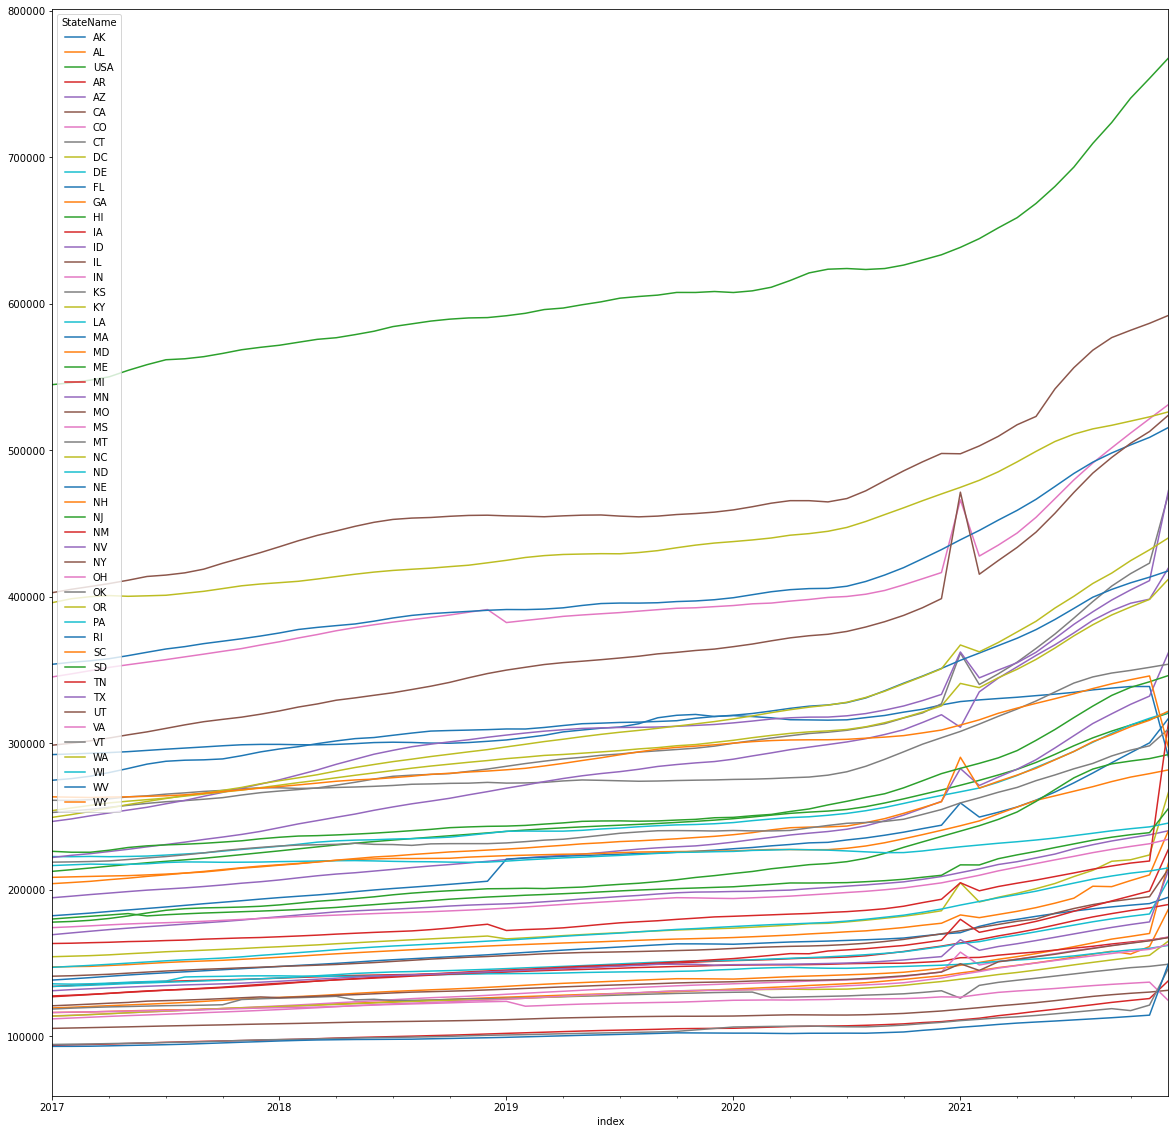

In [127]:
#Remove unwanted columns from the merge
clean_combo = combo_df.drop(columns = ["index"])

#This brings back the region id column that I originally removed to be able to work with the data easier
clean_combo['RegionID']= zillow_data['RegionID'].astype(int)

#Reordering the dataframe to be able to unstack later easily
zillow_final = clean_combo[['StateName','RegionID','SizeRank','RegionName','1/31/2017','2/28/2017','3/31/2017','4/30/2017','5/31/2017','6/30/2017','7/31/2017',
         '8/31/2017','9/30/2017','10/31/2017','11/30/2017','12/31/2017','1/31/2018','2/28/2018',
         '3/31/2018','4/30/2018','5/31/2018','6/30/2018','7/31/2018','8/31/2018','9/30/2018',
         '10/31/2018','11/30/2018','12/31/2018','1/31/2019','2/28/2019','3/31/2019','4/30/2019',
         '5/31/2019','6/30/2019','7/31/2019','8/31/2019','9/30/2019','10/31/2019','11/30/2019',
         '12/31/2019','1/31/2020','2/29/2020','3/31/2020','4/30/2020','5/31/2020','6/30/2020',
         '7/31/2020','8/31/2020','9/30/2020','10/31/2020','11/30/2020','12/31/2020','1/31/2021',
         '2/28/2021','3/31/2021','4/30/2021','5/31/2021','6/30/2021','7/31/2021','8/31/2021',
         '9/30/2021','10/31/2021','11/30/2021','12/31/2021','Totals','Average']]
zillow = zillow_final.groupby("StateName").mean()
zillow = zillow.drop(columns=["RegionID", "SizeRank", "Totals", "Average"])
zillow = zillow.transpose()
zillow = zillow.reset_index()
zillow["index"]=pd.to_datetime(zillow["index"])
zillow['index'] = zillow['index'].dt.to_period("M").apply(lambda r: r.start_time)
zillow = zillow.set_index("index")
zillow = zillow.rename(columns = {"ALL":"USA"})
zillow.plot(figsize = (20,20))

In [6]:
# zillow_final["Date"] = pd..to_datetime(unem_data[['Year', 'Month']].assign(DAY=1))

DATE = [dt.strptime(x,'%m/%d/%Y') for x in dates]

DATE

[datetime.datetime(2017, 1, 31, 0, 0),
 datetime.datetime(2017, 2, 28, 0, 0),
 datetime.datetime(2017, 3, 31, 0, 0),
 datetime.datetime(2017, 4, 30, 0, 0),
 datetime.datetime(2017, 5, 31, 0, 0),
 datetime.datetime(2017, 6, 30, 0, 0),
 datetime.datetime(2017, 7, 31, 0, 0),
 datetime.datetime(2017, 8, 31, 0, 0),
 datetime.datetime(2017, 9, 30, 0, 0),
 datetime.datetime(2017, 10, 31, 0, 0),
 datetime.datetime(2017, 11, 30, 0, 0),
 datetime.datetime(2017, 12, 31, 0, 0),
 datetime.datetime(2018, 1, 31, 0, 0),
 datetime.datetime(2018, 2, 28, 0, 0),
 datetime.datetime(2018, 3, 31, 0, 0),
 datetime.datetime(2018, 4, 30, 0, 0),
 datetime.datetime(2018, 5, 31, 0, 0),
 datetime.datetime(2018, 6, 30, 0, 0),
 datetime.datetime(2018, 7, 31, 0, 0),
 datetime.datetime(2018, 8, 31, 0, 0),
 datetime.datetime(2018, 9, 30, 0, 0),
 datetime.datetime(2018, 10, 31, 0, 0),
 datetime.datetime(2018, 11, 30, 0, 0),
 datetime.datetime(2018, 12, 31, 0, 0),
 datetime.datetime(2019, 1, 31, 0, 0),
 datetime.datetime(

In [7]:
unem_data
unem_data['Date'] = pd.to_datetime(unem_data[['Year', 'Month']].assign(DAY=1))
unem_data

,FIPS Code,State and area,Year,Month,Civilian non-institutional population,Total,Percent of population,EmploymentTotal,Percent of population.1,UnemploymentTotal,UnemplotmentRate,Date
0,1,Alabama,2017,1,"3,878,820","2,186,081",56.4,"2,054,464",53.0,"131,617",6.0,2017-01-01
1,2,Alaska,2017,1,"546,640","357,341",65.4,"330,612",60.5,"26,729",7.5,2017-01-01
2,4,Arizona,2017,1,"5,303,787","3,207,468",60.5,"3,034,808",57.2,"172,660",5.4,2017-01-01
3,5,Arkansas,2017,1,"2,308,326","1,320,110",57.2,"1,262,227",54.7,"57,883",4.4,2017-01-01
4,6,California,2017,1,"30,716,366","19,064,992",62.1,"17,985,443",58.6,"1,079,549",5.7,2017-01-01
...,...,...,...,...,...,...,...,...,...,...,...,...
3175,51,Virginia,2021,12,"6,803,998","4,272,370",62.8,"4,155,254",61.1,"117,116",2.7,2021-12-01
3176,53,Washington,2021,12,"6,169,103","3,968,555",64.3,"3,811,532",61.8,"157,023",4.0,2021-12-01
3177,54,West Virginia,2021,12,"1,443,370","789,702",54.7,"761,779",52.8,"27,923",3.5,2021-12-01
3178,55,Wisconsin,2021,12,"4,723,855","3,124,753",66.1,"3,052,474",64.6,"72,279",2.3,2021-12-01


In [92]:
unem_data = unem_data.sort_values(["State and area", "Date"])

swap = unem_data.stack(level=0).unstack(level=0)

swap = swap.rename(columns=swap.iloc[11].loc[0:])
sort_df = unem_data.sort_values(["State and area", "Date"])
x = sort_df[["State and area", "UnemplotmentRate", "Date"]]
x.stack(level=0).unstack(level=0)

,0,53,106,159,212,265,318,371,424,477,...,2702,2755,2808,2861,2914,2967,3020,3073,3126,3179
State and area,Alabama,Alabama,Alabama,Alabama,Alabama,Alabama,Alabama,Alabama,Alabama,Alabama,...,Wyoming,Wyoming,Wyoming,Wyoming,Wyoming,Wyoming,Wyoming,Wyoming,Wyoming,Wyoming
UnemplotmentRate,6.0,5.6,5.0,4.3,4.1,4.9,4.7,4.5,3.9,3.8,...,5.4,5.0,4.7,5.0,4.3,3.9,3.4,3.5,3.5,3.2
Date,2017-01-01 00:00:00,2017-02-01 00:00:00,2017-03-01 00:00:00,2017-04-01 00:00:00,2017-05-01 00:00:00,2017-06-01 00:00:00,2017-07-01 00:00:00,2017-08-01 00:00:00,2017-09-01 00:00:00,2017-10-01 00:00:00,...,2021-03-01 00:00:00,2021-04-01 00:00:00,2021-05-01 00:00:00,2021-06-01 00:00:00,2021-07-01 00:00:00,2021-08-01 00:00:00,2021-09-01 00:00:00,2021-10-01 00:00:00,2021-11-01 00:00:00,2021-12-01 00:00:00


In [90]:
dropped = swap.drop(index = ["FIPS Code", "Year", "Month", "Civilian non-institutional population", "Total","Percent of population", "EmploymentTotal", "Percent of population.1"])
dropped = dropped.drop(index = ["UnemploymentTotal", "Date"])
dropped

,2017-01-01,2017-02-01,2017-03-01,2017-04-01,2017-05-01,2017-06-01,2017-07-01,2017-08-01,2017-09-01,2017-10-01,...,2021-03-01,2021-04-01,2021-05-01,2021-06-01,2021-07-01,2021-08-01,2021-09-01,2021-10-01,2021-11-01,2021-12-01
State and area,Alabama,Alabama,Alabama,Alabama,Alabama,Alabama,Alabama,Alabama,Alabama,Alabama,...,Wyoming,Wyoming,Wyoming,Wyoming,Wyoming,Wyoming,Wyoming,Wyoming,Wyoming,Wyoming
UnemplotmentRate,6.0,5.6,5.0,4.3,4.1,4.9,4.7,4.5,3.9,3.8,...,5.4,5.0,4.7,5.0,4.3,3.9,3.4,3.5,3.5,3.2


In [107]:
pd.pivot_table(unem_data, values= "UnemplotmentRate",
                    index="Date", columns='State and area',aggfunc=np.sum)
#.plot(figsize=(20,20))

State and area,Alabama,Alaska,Arizona,Arkansas,California,Colorado,Connecticut,Delaware,District of Columbia,Florida,...,South Dakota,Tennessee,Texas,Utah,Vermont,Virginia,Washington,West Virginia,Wisconsin,Wyoming
Date,,,,,,,,,,,,,,,,,,,,,
2017-01-01,6.0,7.5,5.4,4.4,5.7,3.1,5.2,5.2,6.7,4.9,...,3.6,5.0,5.0,3.4,3.6,4.4,5.5,6.4,3.9,5.5
2017-02-01,5.6,7.4,5.1,4.4,5.5,2.9,5.1,5.1,6.6,4.5,...,3.7,4.6,5.0,3.6,3.6,4.2,5.3,6.3,4.0,5.0
2017-03-01,5.0,7.0,4.9,3.6,5.2,2.4,4.7,4.7,6.1,4.3,...,3.3,4.1,4.6,3.4,3.5,4.0,4.9,5.7,3.6,4.8
2017-04-01,4.3,6.6,4.7,3.2,4.7,2.3,4.2,4.3,5.5,4.0,...,3.1,3.4,4.2,3.1,3.3,3.5,4.3,4.9,3.1,4.2
2017-05-01,4.1,6.3,4.8,3.6,4.4,2.3,4.4,4.2,5.7,4.1,...,2.9,3.2,4.2,3.0,2.9,3.7,4.3,4.6,3.1,4.1
2017-06-01,4.9,6.5,5.2,3.9,4.9,2.7,4.5,4.7,6.5,4.4,...,3.0,4.1,4.6,3.4,3.0,3.7,4.4,5.2,3.7,4.2
2017-07-01,4.7,6.1,5.3,4.1,5.2,2.7,4.7,4.8,6.7,4.5,...,2.8,3.9,4.5,3.2,2.9,3.7,4.5,5.2,3.4,4.0
2017-08-01,4.5,5.9,5.3,3.9,5.1,2.7,4.6,4.8,6.5,4.6,...,3.1,3.6,4.5,3.4,2.9,3.8,4.7,5.4,3.4,3.9
2017-09-01,3.9,5.9,4.9,3.5,4.5,2.5,4.1,4.2,6.0,4.2,...,2.6,3.2,4.1,2.8,2.7,3.5,4.4,4.5,2.9,3.7


In [93]:
unem_data

,FIPS Code,State and area,Year,Month,Civilian non-institutional population,Total,Percent of population,EmploymentTotal,Percent of population.1,UnemploymentTotal,UnemplotmentRate,Date
0,1,Alabama,2017,1,"3,878,820","2,186,081",56.4,"2,054,464",53.0,"131,617",6.0,2017-01-01
53,1,Alabama,2017,2,"3,880,377","2,195,667",56.6,"2,071,956",53.4,"123,711",5.6,2017-02-01
106,1,Alabama,2017,3,"3,882,073","2,199,288",56.7,"2,089,518",53.8,"109,770",5.0,2017-03-01
159,1,Alabama,2017,4,"3,883,878","2,202,139",56.7,"2,108,072",54.3,"94,067",4.3,2017-04-01
212,1,Alabama,2017,5,"3,885,734","2,195,532",56.5,"2,105,456",54.2,"90,076",4.1,2017-05-01
...,...,...,...,...,...,...,...,...,...,...,...,...
2967,56,Wyoming,2021,8,"453,778","291,269",64.2,"279,881",61.7,"11,388",3.9,2021-08-01
3020,56,Wyoming,2021,9,"454,201","290,526",64.0,"280,546",61.8,"9,980",3.4,2021-09-01
3073,56,Wyoming,2021,10,"454,611","290,544",63.9,"280,420",61.7,"10,124",3.5,2021-10-01
3126,56,Wyoming,2021,11,"455,024","290,796",63.9,"280,690",61.7,"10,106",3.5,2021-11-01


In [130]:
import requests, json
url = "https://gist.githubusercontent.com/mshafrir/2646763/raw/8b0dbb93521f5d6889502305335104218454c2bf/states_titlecase.json"
data = requests.get(url)
abbrv = pd.DataFrame(json.loads(data.text))
abbrv

,name,abbreviation
0,Alabama,AL
1,Alaska,AK
2,American Samoa,AS
3,Arizona,AZ
4,Arkansas,AR
5,California,CA
6,Colorado,CO
7,Connecticut,CT
8,Delaware,DE
9,District Of Columbia,DC
